## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import calendar
import pandas as pd
import numpy as np

**0. Load seaborn dataset "tips"**

In [2]:
df = sns.load_dataset("tips")
display(df.sample(3))
print(df.describe(percentiles=[]).T, )
df.dtypes

,total_bill,tip,sex,smoker,day,time,size
116,29.93,5.07,Male,No,Sun,Dinner,4
103,22.42,3.48,Female,Yes,Sat,Dinner,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1


            count       mean       std   min     50%    max
total_bill  244.0  19.785943  8.902412  3.07  17.795  50.81
tip         244.0   2.998279  1.383638  1.00   2.900  10.00
size        244.0   2.569672  0.951100  1.00   2.000   6.00


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

**1. What is the prefered day for eating?**

In [3]:
def day2num(day):
    '''
    funcion que convierte el string de 
    un dia de la semana a numero yendo de 0 a 6
    '''
    day = str(day)[:3]
    numday= time.strptime(day, '%a').tm_wday
    return numday



#calculo el numero del dia de la semana para cada dia "day" bajo el campo "week_day_num"

df['week_day_num'] = df['day'].apply(day2num)
display(df.sample(3))

#ahora calculo la moda de esa columna

mode_ = int(df['week_day_num'].mode())
print(f"El dia mas preferido para comer es {calendar.day_name[mode_]}")

,total_bill,tip,sex,smoker,day,time,size,week_day_num
190,15.69,1.50,Male,Yes,Sun,Dinner,2,6
85,34.83,5.17,Female,No,Thur,Lunch,4,3
116,29.93,5.07,Male,No,Sun,Dinner,4,6


El dia mas preferido para comer es Saturday


**2. What days of the week has more men than women payers?**

In [4]:
df_sex = df.groupby(["sex", "day"]).count()
df_sex.reset_index(["sex", "day"], inplace = True)
display(df_sex)

,sex,day,total_bill,tip,smoker,time,size,week_day_num
0,Male,Thur,30,30,30,30,30,30
1,Male,Fri,10,10,10,10,10,10
2,Male,Sat,59,59,59,59,59,59
3,Male,Sun,58,58,58,58,58,58
4,Female,Thur,32,32,32,32,32,32
5,Female,Fri,9,9,9,9,9,9
6,Female,Sat,28,28,28,28,28,28
7,Female,Sun,18,18,18,18,18,18


In [5]:
#dropeo los campos que no me interesan
field2drop = ['total_bill','tip','smoker','time','size']
df_sex = df_sex.drop(field2drop, axis = 1)
display(df_sex)

,sex,day,week_day_num
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [6]:
#creo dos df uno para hombre sy otro para mujeres
df_male = df_sex[df_sex["sex"] == "Male"]
df_female = df_sex[df_sex["sex"] == "Female"]

display(df_male,df_female)

,sex,day,week_day_num
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58


,sex,day,week_day_num
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [7]:
#hago un renombre del campo de estudio
renaming_m = {"week_day_num": "coun_m"}
renaming_f = {"week_day_num": "coun_f"}
df_male.rename(columns = renaming_m, inplace = True)
df_female.rename(columns = renaming_f, inplace = True)

display(df_male,df_female)

/var/folders/2_/bnd0fncj143gc6x61sb7k8mc0000gn/T/ipykernel_38642/2366160992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male.rename(columns = renaming_m, inplace = True)
/var/folders/2_/bnd0fncj143gc6x61sb7k8mc0000gn/T/ipykernel_38642/2366160992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female.rename(columns = renaming_f, inplace = True)


,sex,day,coun_m
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58


,sex,day,coun_f
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [8]:
#ahora hago un join para tener todo dispuesto para poder hacer calculos

df_sex_merged = pd.merge(df_male, df_female,  how='outer', left_on=['day'], right_on = ['day'])
df_sex_merged.replace(np.nan, 0) #por si existieran algun nan
display(df_sex_merged)


,sex_x,day,coun_m,sex_y,coun_f
0,Male,Thur,30,Female,32
1,Male,Fri,10,Female,9
2,Male,Sat,59,Female,28
3,Male,Sun,58,Female,18


In [16]:
# ahora calcuo los dias en los que count_f sea > que count_m
solution = df_sex_merged[df_sex_merged["coun_f"] > df_sex_merged["coun_m"]]
display(solution)

,sex_x,day,coun_m,sex_y,coun_f
0,Male,Thur,30,Female,32


**3. Do you think bill amounts change considerably depending on smoking?**

In [19]:
#vamos a generar un df para el calculo de esta pregunta
field2drop = ['tip','sex','day','time','size','week_day_num']
df_smoker = df
df_smoker = df_smoker.drop(field2drop, axis = 1)
display(df_smoker.sample(3))

,total_bill,smoker
73,25.28,Yes
128,11.38,No
155,29.85,No


In [21]:
#ahora hago un group by por smoker calculando la media de total bill
df_smoker_grouped = df_smoker.groupby(["smoker"]).mean()
display(df_smoker_grouped)

,total_bill
smoker,
Yes,20.756344
No,19.188278


In [ ]:
# parace que en caso de ser fumador la cuenta aumenta un poco de media, pero no de forma significativa

**4. Is tip correlated to total_bill? Draw a scatter plot**

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


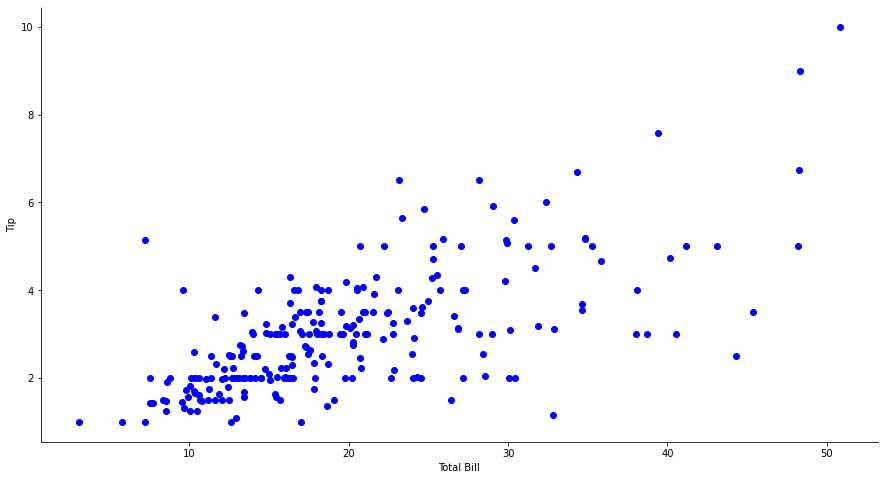

In [35]:
# generamos una matriz de correlacion de los campos numericos del dataframe

df_corr = df.corr(method ='pearson')
x = df["total_bill"]
y = df["tip"]

plt.rcParams["figure.figsize"] = (15,8)

ax = plt.axes() 
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')

plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.plot(x, y, 'o', color='blue');
display(df_corr)

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

,total_bill,tip,sex,smoker,day,time,size,week_day_num,tip_perc
23,39.42,7.58,Male,No,Sat,Dinner,4,5,0.192288
73,25.28,5.00,Female,Yes,Sat,Dinner,2,5,0.197785
2,21.01,3.50,Male,No,Sun,Dinner,3,6,0.166587
239,29.03,5.92,Male,No,Sat,Dinner,3,5,0.203927
129,22.82,2.18,Male,No,Thur,Lunch,3,3,0.095530
139,13.16,2.75,Female,No,Thur,Lunch,2,3,0.208967
126,8.52,1.48,Male,No,Thur,Lunch,2,3,0.173709


/Users/eduardoarroyo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


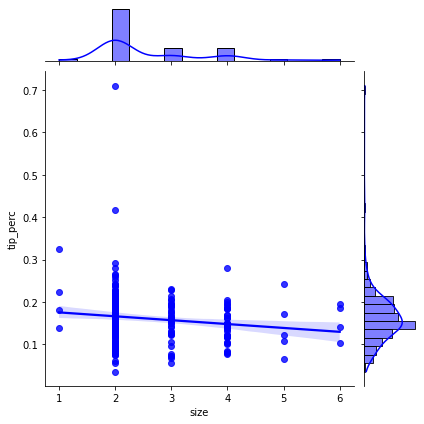

In [64]:

df['tip_perc'] = df['tip']/df['total_bill']
display(df.sample(7))

x = df['size']
y = df['tip_perc']


sns.jointplot(x,y,
             kind = 'reg',
             color = 'blue' )

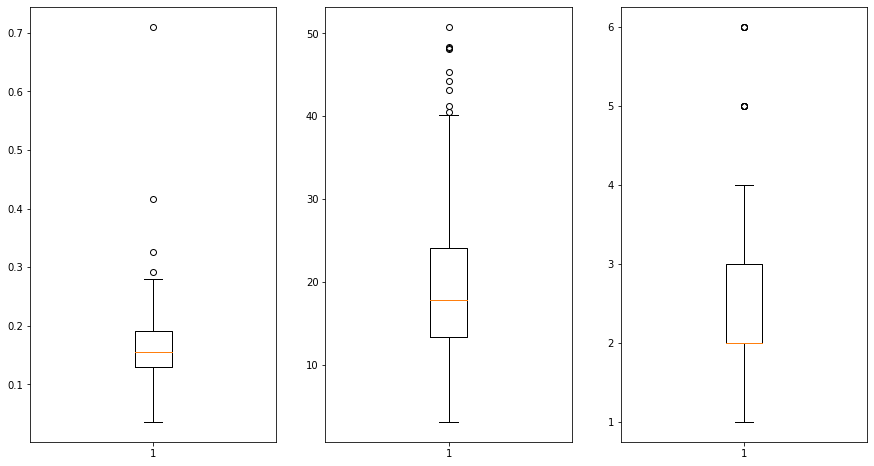

In [69]:
fig, ax = plt.subplots(1, 3) 

ax[0].boxplot(df['tip_perc']) 
ax[1].boxplot(df['total_bill'])
ax[2].boxplot(df['size']) 

plt.show()